### Import

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\NI225_201911'
NI225_path = os.path.join(dir_data, 'EN_1M_MostActive.txt')
NI225 = pd.read_csv(NI225_path, engine='python')
NI225.dropna(how='any',inplace=True)
NI225.Date = pd.to_datetime(NI225.Date)
# Create Year & month & Return
NI225['Year'] = NI225['Date'].map(lambda x: x.year)
NI225['Month'] = NI225['Date'].map(lambda x: x.month)
NI225['Range'] = NI225['High'] - NI225['Low']
NI225['Diff'] = NI225['Close'] - NI225['Open']
NI225['Rotate'] = abs(NI225['Range']) / NI225['Diff']
NI225['Up_down'] = NI225['Diff'].map(lambda x: 1 if x > 0 else -1)
NI225['Return'] = ((NI225['Close'] - NI225['Open']) / NI225['Open'])*100
NI225['P_Return'] = ((NI225['High'] - NI225['Low']) / NI225['Low'])*100
# Sort NI225 by Date
NI225 = NI225.sort_values(by = ['Date', 'Time'])
Year_sorted = np.sort(NI225.Year.unique())
NI225.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return
0,2003-07-01,15:31,9275.0,9275.0,9270.0,9270.0,75,2003,7,5.0,-5.0,-1.0,-1,-0.053908,0.053937
1,2003-07-01,15:32,9270.0,9270.0,9260.0,9265.0,37,2003,7,10.0,-5.0,-2.0,-1,-0.053937,0.107991
2,2003-07-01,15:33,9260.0,9265.0,9260.0,9265.0,66,2003,7,5.0,5.0,1.0,1,0.053996,0.053996
3,2003-07-01,15:34,9265.0,9265.0,9265.0,9265.0,77,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000
4,2003-07-01,15:35,9265.0,9265.0,9265.0,9265.0,45,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000


In [16]:
# Split time
time = NI225['Time'].str.split(':', 2, expand = True)
NI225['Hour'] = time[0].astype(int)
NI225['Min'] = time[1].astype(int)
NI225.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return,Min,Hour
0,2003-07-01,15:31,9275.0,9275.0,9270.0,9270.0,75,2003,7,5.0,-5.0,-1.0,-1,-0.053908,0.053937,31,15
1,2003-07-01,15:32,9270.0,9270.0,9260.0,9265.0,37,2003,7,10.0,-5.0,-2.0,-1,-0.053937,0.107991,32,15
2,2003-07-01,15:33,9260.0,9265.0,9260.0,9265.0,66,2003,7,5.0,5.0,1.0,1,0.053996,0.053996,33,15
3,2003-07-01,15:34,9265.0,9265.0,9265.0,9265.0,77,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000,34,15
4,2003-07-01,15:35,9265.0,9265.0,9265.0,9265.0,45,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000,35,15


### EDA

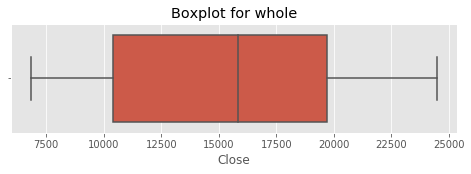

In [17]:
# Box plot for whole
plt.figure(figsize=(8,2))    
sns.boxplot(NI225.loc[:, 'Close'])
plt.title('Boxplot for whole')
plt.show()

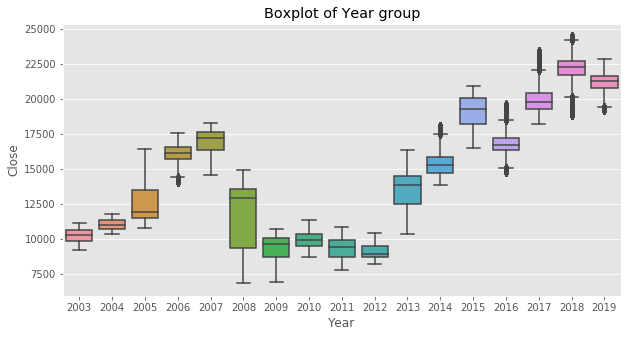

In [18]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='Close', data=NI225)
plt.title('Boxplot of Year group')
plt.show()

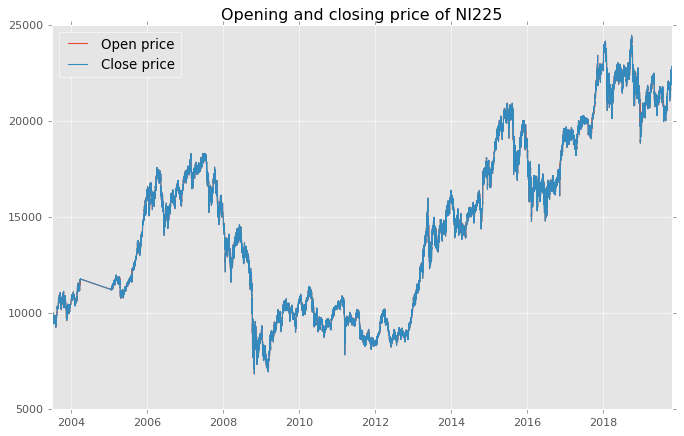

In [27]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price of NI225")
plt.plot(NI225['Date'], NI225['Open'], label='Open price')
plt.plot(NI225['Date'], NI225['Close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'NI225 Return')

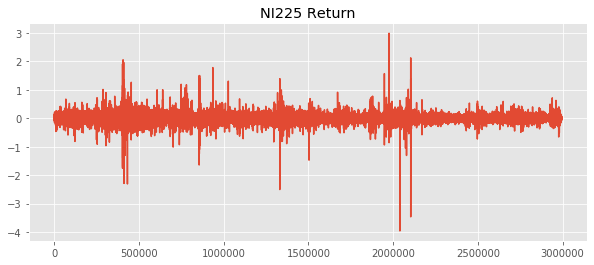

In [19]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(NI225.Return)
plt.title('NI225 Return')

Text(0.5, 1.0, 'NI225 P_Return')

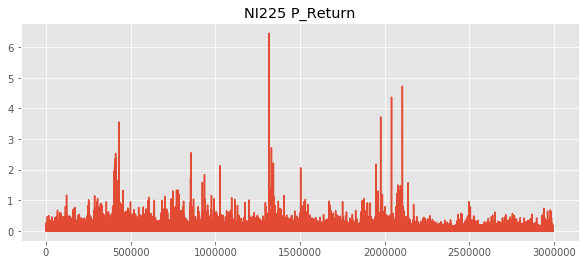

In [21]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(NI225.P_Return)
plt.title('NI225 P_Return')

In [28]:
# Rotate
NI225['Rotate'] = NI225['Rotate'].replace([np.inf, -np.inf], np.nan)
NI225['Rotate'].dropna(how='any',inplace=True)

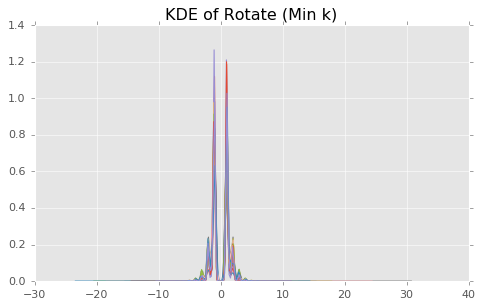

In [35]:
# KDE of Rotate (Min k)
Year_sorted = np.sort(NI225.Year.unique())
plt.figure(figsize=(7,4))
for i in range(len(Year_sorted)):
    sns.kdeplot(NI225.loc[(NI225['Year'] == Year_sorted[i]) & \
                                      (-35 <= NI225['Rotate']) & \
                                      (35 >= NI225['Rotate']) \
                                      ,'Rotate'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Min k)')
plt.legend().remove()
plt.show()

In [36]:
# Calculate consecutive ups and downs
# ref:https://codereview.stackexchange.com/questions/138550/count-consecutive-ones-in-a-binary-list
def Go_up_num(Series):
    positive_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == 1:
            current += 1
        else:
            longest = max(longest, current)
            positive_list.append(longest)
            current = 0
    return positive_list

def Go_down_num(Series):
    negative_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == -1:
            current += 1
        else:
            longest = max(longest, current)
            negative_list.append(longest)
            current = 0
    return negative_list

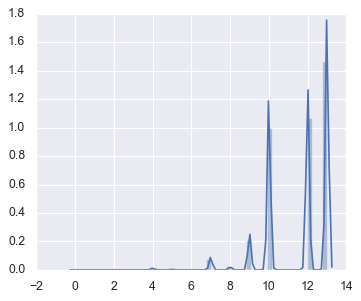

In [42]:
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(NI225['Up_down']))

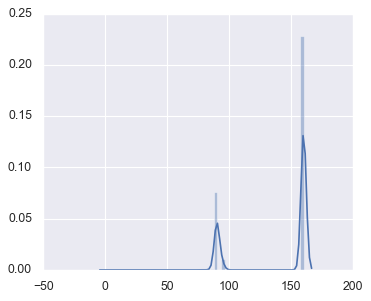

In [43]:
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(NI225['Up_down']))

### Hour k

In [40]:
# from min k to hour k
import os
import pandas as pd
import datetime

stock = NI225.set_index('Date')
period_stock_data = pd.DataFrame()
period_stock_data['open_hour'] = stock.groupby([stock.index,'Hour'])['Open'].first()
period_stock_data['close_hour'] = stock.groupby([stock.index,'Hour'])['Close'].first()
period_stock_data['high_hour'] = stock.groupby([stock.index,'Hour'])['High'].max()
period_stock_data['low_hour'] = stock.groupby([stock.index,'Hour'])['Low'].min()
period_stock_data['volume_hour'] = stock.groupby([stock.index,'Hour'])['Volume'].sum()
period_stock_data['range_hour'] = period_stock_data['high_hour'] - period_stock_data['low_hour']
period_stock_data['diff_hour'] = period_stock_data['close_hour'] - period_stock_data['open_hour']
period_stock_data['rotate_hour'] = abs(period_stock_data['range_hour']) / period_stock_data['diff_hour']
period_stock_data['up_down_hour'] = period_stock_data['diff_hour'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_hour'] = ((period_stock_data['close_hour'] -  \
                                     period_stock_data['open_hour']) / period_stock_data['open_hour']) *100
period_stock_data['P_return_hour'] = ((period_stock_data['high_hour'] -  \
                                     period_stock_data['low_hour']) / period_stock_data['low_hour']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data['Year'] = period_stock_data['Date'].map(lambda x: x.year)
period_stock_data.head()

,Date,Hour,open_hour,close_hour,high_hour,low_hour,volume_hour,range_hour,diff_hour,rotate_hour,up_down_hour,return_hour,P_return_hour,Year
0,2003-07-01,15,9275.0,9270.0,9275.0,9260.0,832,15.0,-5.0,-3.0,-1,-0.053908,0.161987,2003
1,2003-07-01,16,9270.0,9270.0,9270.0,9245.0,1189,25.0,0.0,inf,-1,0.000000,0.270416,2003
2,2003-07-01,17,9250.0,9250.0,9255.0,9250.0,673,5.0,0.0,inf,-1,0.000000,0.054054,2003
3,2003-07-01,18,9255.0,9250.0,9260.0,9240.0,887,20.0,-5.0,-4.0,-1,-0.054025,0.216450,2003
4,2003-07-01,19,9250.0,9245.0,9250.0,9245.0,11,5.0,-5.0,-1.0,-1,-0.054054,0.054083,2003


In [44]:
# Rotate(Hour)
period_stock_data['rotate_hour'] = period_stock_data['rotate_hour'].replace([np.inf, -np.inf], np.nan)
period_stock_data['rotate_hour'].dropna(how='any',inplace=True)

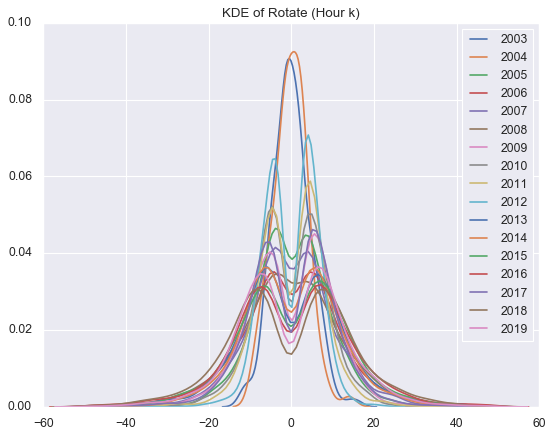

In [46]:
# KDE of Rotate (Hour k)
Year_sorted = np.sort(NI225.Year.unique())
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.kdeplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i]) & \
                                      (-50 <= period_stock_data['rotate_hour']) & \
                                      (50 >= period_stock_data['rotate_hour']) \
                                      ,'rotate_hour'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Hour k)')
plt.legend()
plt.show()

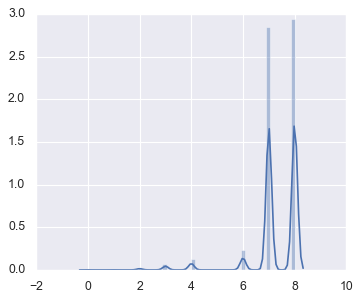

In [47]:
sns.distplot(Go_up_num(period_stock_data['up_down_hour']))

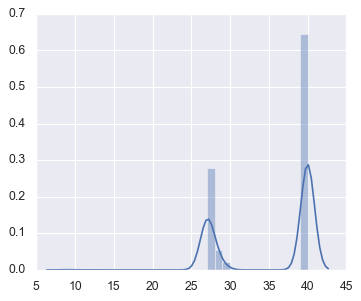

In [48]:
sns.distplot(Go_down_num(period_stock_data['up_down_hour']))

In [49]:
# Growth rate_hour_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close_change': period_stock_data.close_hour})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change['Hour'] = pd.DataFrame(period_stock_data.iloc[:, [0,1]]).set_index('Date')
stock_change['Year'] = pd.DataFrame(period_stock_data.iloc[:, [0,-1]]).set_index('Date')
stock_change['Hour'] = stock_change['Hour'].astype(int)
stock_change = stock_change.sort_values(by=['Year','Hour'])
stock_change.head()

,Close_change,Hour,Year
Date,,,
2003-07-01,NaN,15,2003
2003-07-02,0.035595,15,2003
2003-07-03,0.001045,15,2003
2003-07-04,0.004184,15,2003
2003-07-07,0.025266,15,2003


Text(0.5, 1.0, 'NI225 scatter plots')

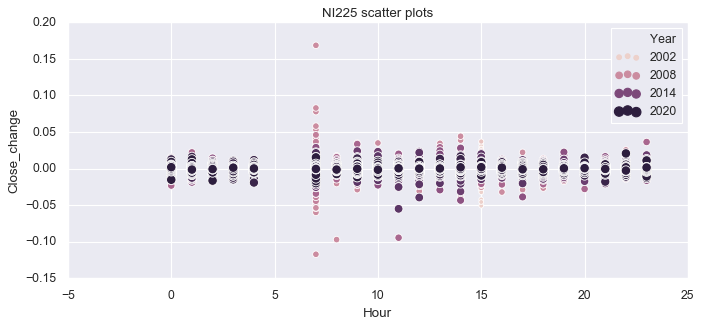

In [51]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
sns.scatterplot(x=stock_change['Hour'], y=stock_change['Close_change'],size=stock_change.Year,hue = stock_change.Year)
plt.title('NI225 scatter plots')

Text(0.5, 1.0, 'NI225 hour_return scatter plots')

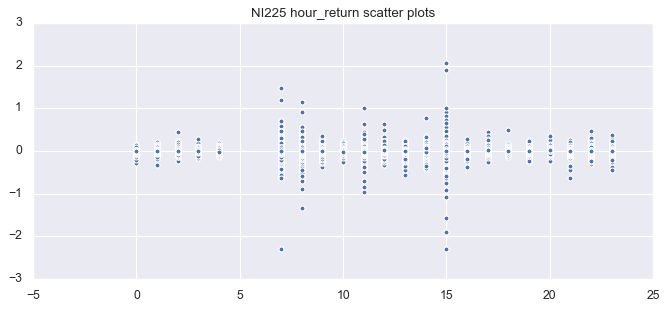

In [52]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.Hour, period_stock_data.return_hour)
plt.title('NI225 hour_return scatter plots')

Text(0.5, 1.0, 'NI225 hour_return_Positive scatter plots')

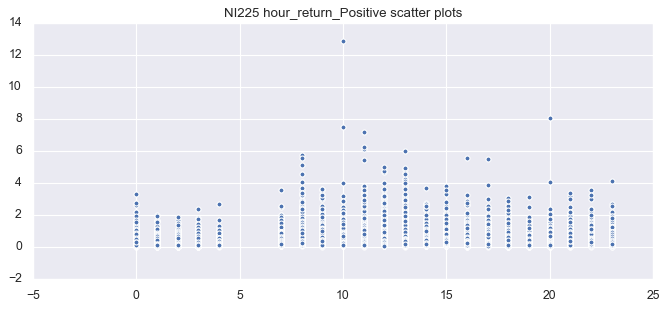

In [53]:
# Stock distribution_day_chage
fig, ax = plt.subplots(figsize = (10,4))
plt.scatter(period_stock_data.Hour, period_stock_data.P_return_hour)
plt.title('NI225 hour_return_Positive scatter plots')

### Day k

In [61]:
# from min k to day k
stock = NI225.set_index('Date')
period_type = 'D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_day'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_day'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_day'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_day'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_day'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data['range_day'] = period_stock_data['high_day'] - period_stock_data['low_day']
period_stock_data['diff_day'] = period_stock_data['close_day'] - period_stock_data['open_day']
period_stock_data['rotate_day'] = abs(period_stock_data['range_day']) / period_stock_data['diff_day']
period_stock_data['up_down_day'] = period_stock_data['diff_day'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_day'] = ((period_stock_data['close_day'] -  \
                                     period_stock_data['open_day']) / period_stock_data['open_day']) *100
period_stock_data['P_return_day'] = ((period_stock_data['high_day'] -  \
                                     period_stock_data['low_day']) / period_stock_data['low_day']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Range,...,close_day,high_day,low_day,volume_day,range_day,diff_day,rotate_day,up_down_day,return_day,P_return_day
0,2003-07-01,19:00,9250.0,9250.0,9245.0,9245.0,11.0,2003.0,7.0,5.0,...,9245.0,9275.0,9240.0,3592,35.0,-30.0,-1.166667,-1,-0.323450,0.378788
1,2003-07-02,19:00,9560.0,9560.0,9560.0,9560.0,4.0,2003.0,7.0,0.0,...,9560.0,9590.0,9550.0,4959,40.0,-25.0,-1.600000,-1,-0.260824,0.418848
2,2003-07-03,19:00,9535.0,9540.0,9535.0,9540.0,43.0,2003.0,7.0,5.0,...,9540.0,9580.0,9535.0,4506,45.0,-25.0,-1.800000,-1,-0.261370,0.471945
3,2003-07-04,19:00,9570.0,9570.0,9570.0,9570.0,14.0,2003.0,7.0,0.0,...,9570.0,9590.0,9570.0,1255,20.0,-10.0,-2.000000,-1,-0.104384,0.208986
4,2003-07-07,19:00,9845.0,9845.0,9840.0,9840.0,5.0,2003.0,7.0,5.0,...,9840.0,9875.0,9815.0,3842,60.0,25.0,2.400000,1,0.254712,0.611309


In [55]:
# Rotate (Day)
period_stock_data['rotate_day'] = period_stock_data['rotate_day'].replace([np.inf, -np.inf], np.nan)
period_stock_data['rotate_day'].dropna(how='any',inplace=True)

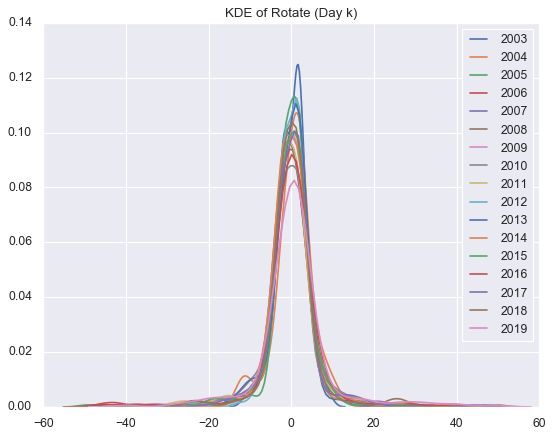

In [57]:
# KDE of Rotate (Day k)
Year_sorted = np.sort(NI225.Year.unique())
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.kdeplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i]) & \
                                      (-50 <= period_stock_data['rotate_day']) & \
                                      (50 >= period_stock_data['rotate_day']) \
                                      ,'rotate_day'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Day k)')
plt.legend()
plt.show()

In [58]:
# Over Yesterday
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 1806:
        c.append(period_stock_data.loc[i+1, 'open_day'] > period_stock_data.loc[i, 'close_day'])
        d.append(period_stock_data.loc[i+1, 'open_day'] < period_stock_data.loc[i, 'close_day'])
    else:
        break
print("Over yesterday high:%.2f"% ((sum(c)/2441)*100) + "%")
print("Over yesterday low:%.2f"% ((sum(d)/2441)*100) + "%")

Over yesterday high:36.95%
Over yesterday low:28.76%


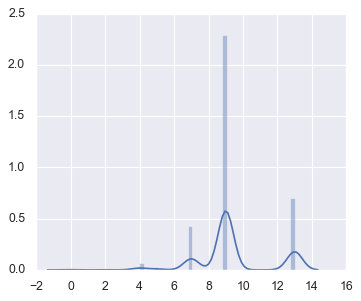

In [59]:
sns.distplot(Go_up_num(period_stock_data['up_down_day']))

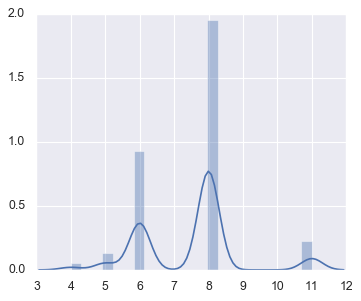

In [60]:
sns.distplot(Go_down_num(period_stock_data['up_down_day']))

### MACD

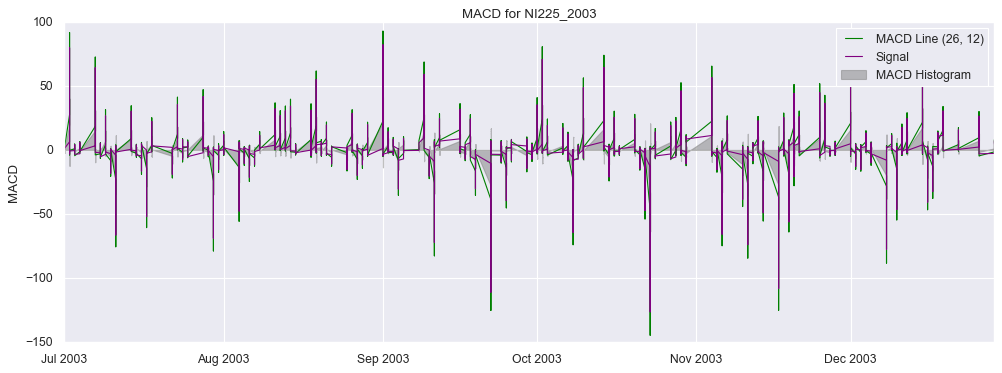

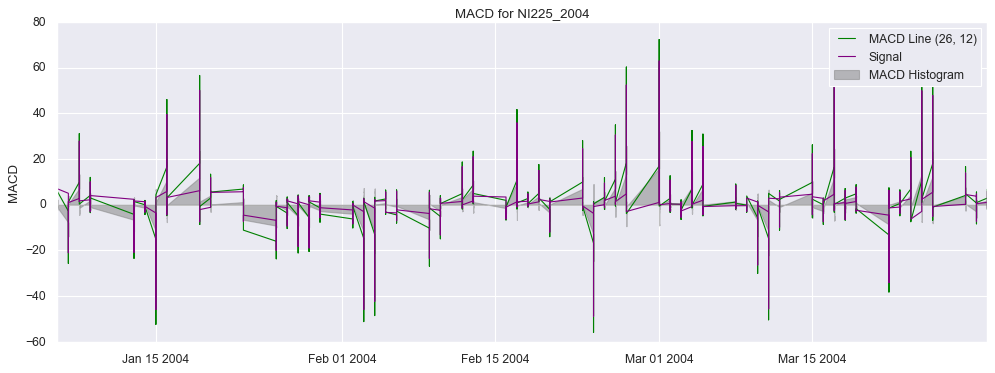

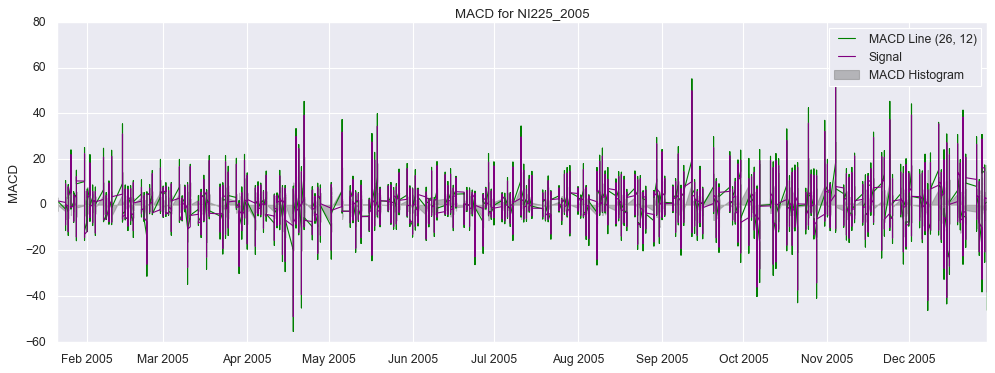

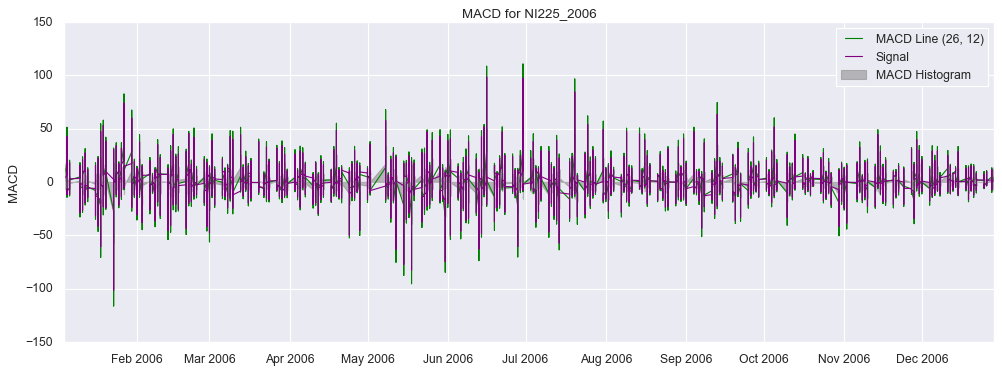

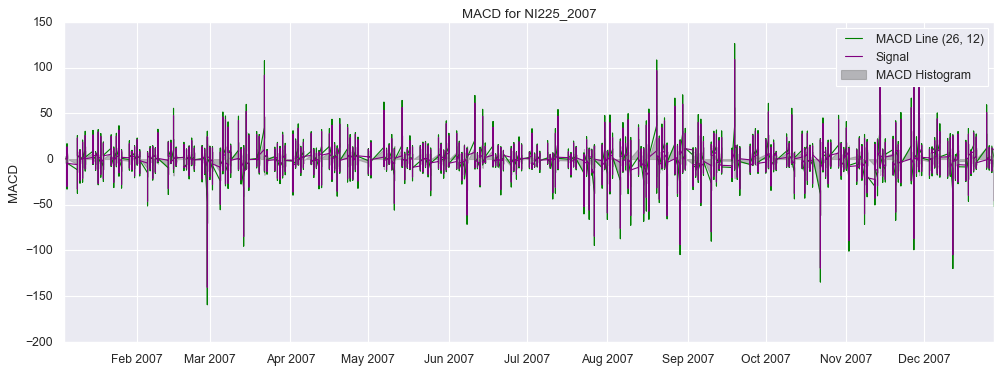

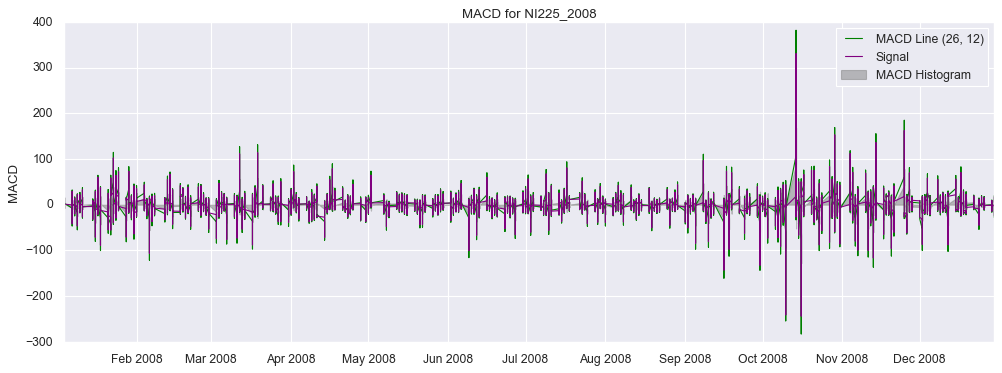

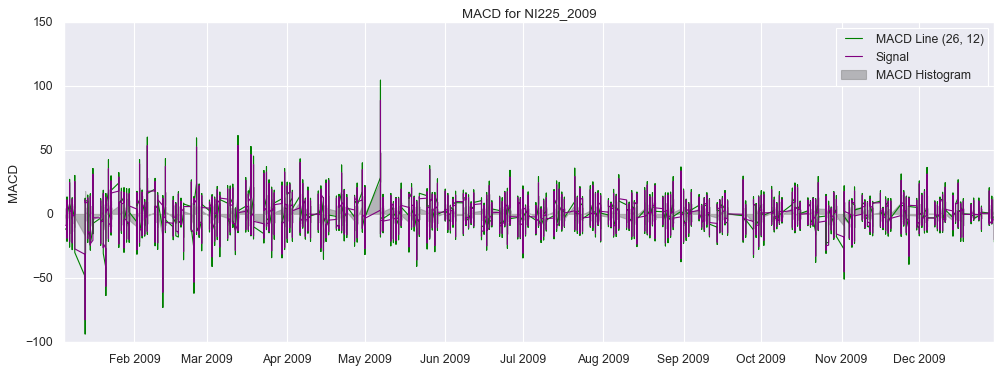

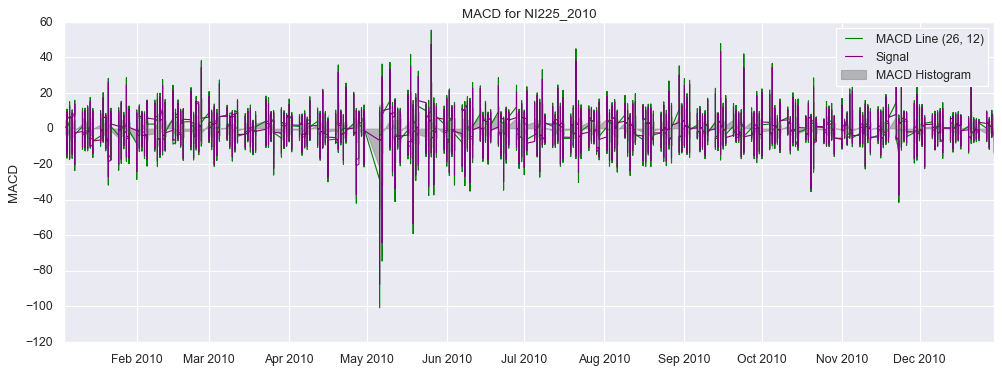

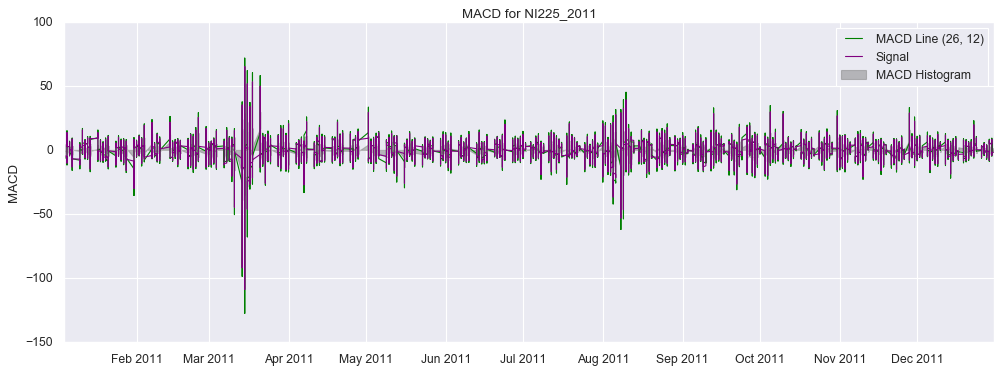

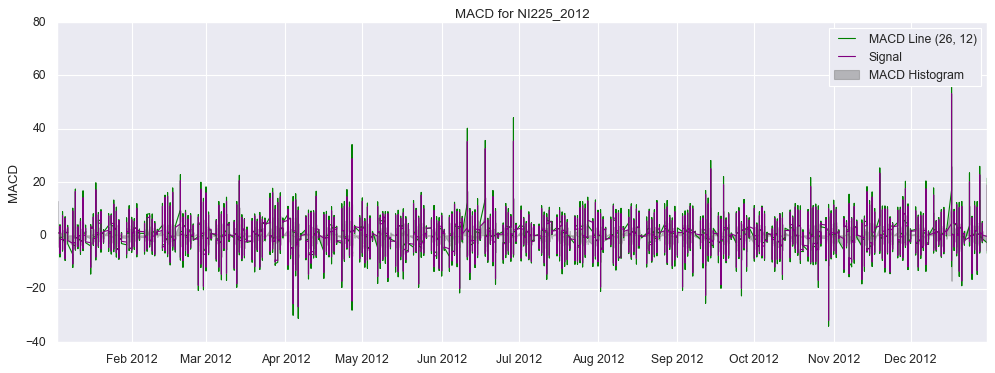

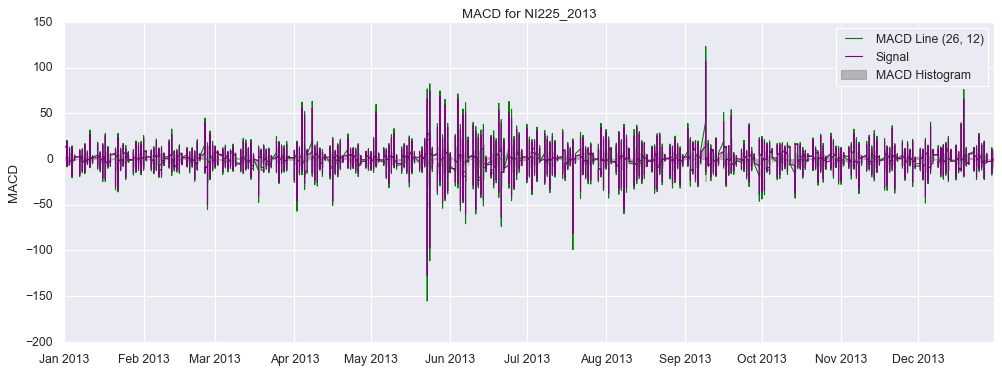

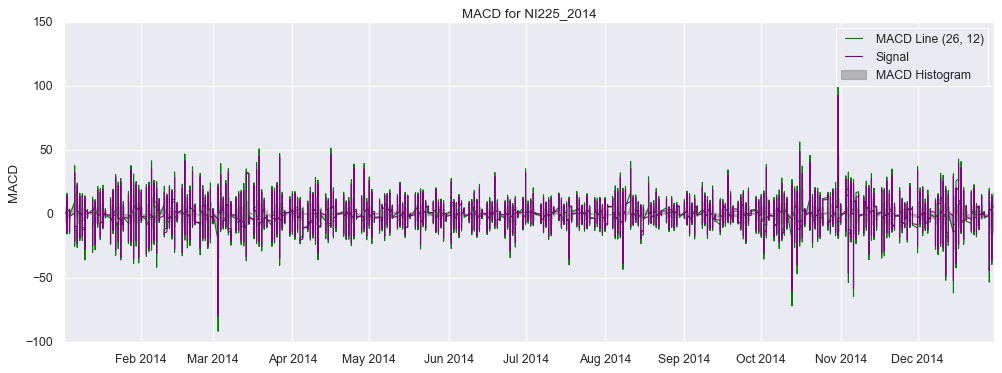

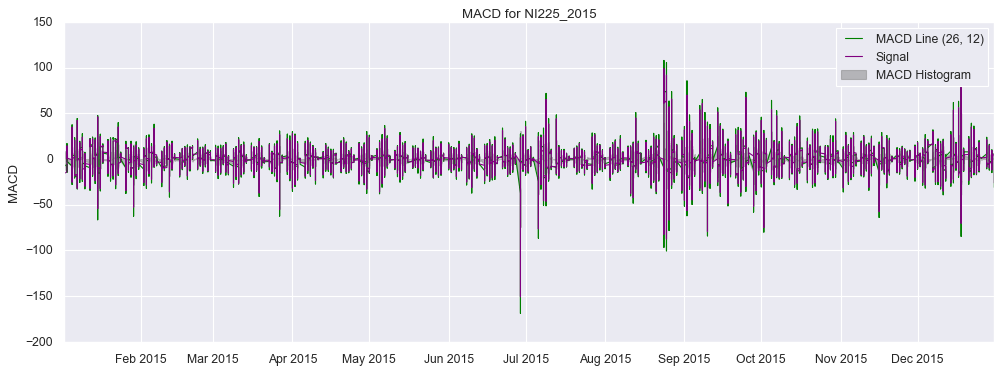

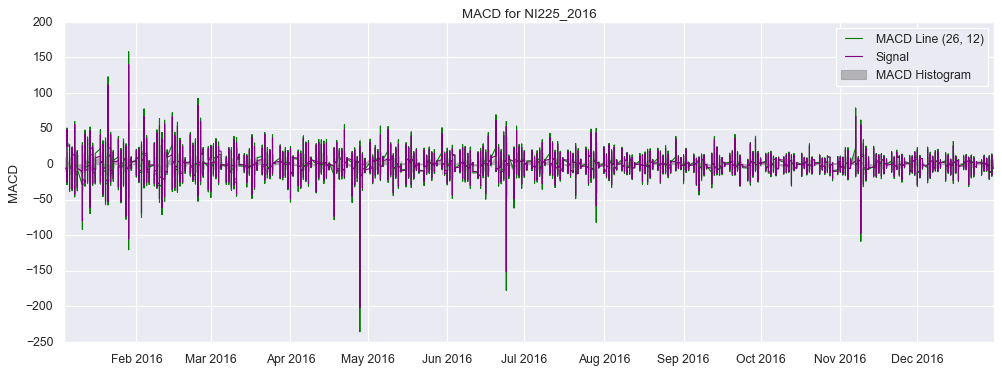

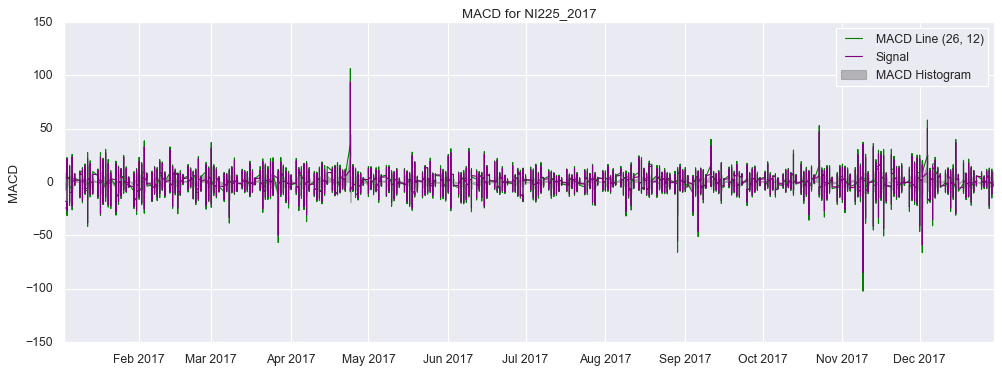

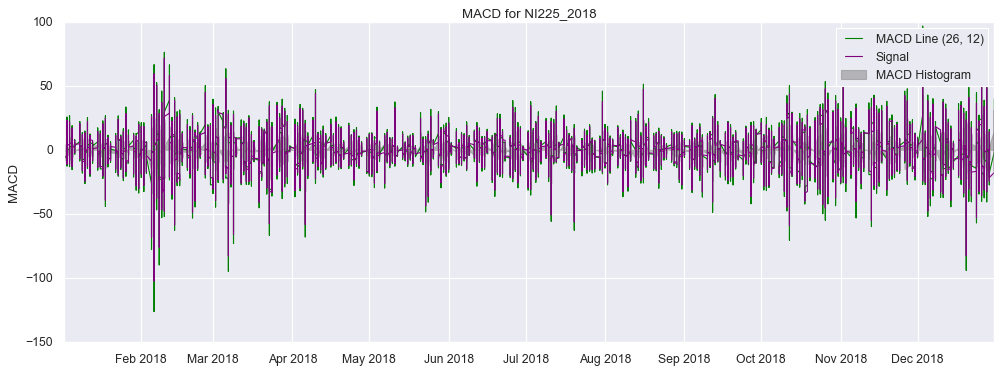

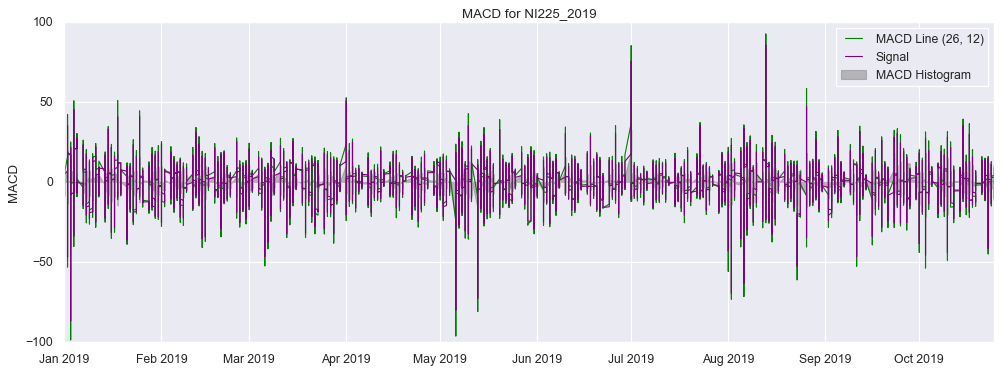

In [96]:
for i in range(len(Year_sorted)):
    exp1 = NI225.loc[(NI225['Year'] == 2003 + i), 'Close'].ewm(span=12, adjust=False).mean()
    exp2 = NI225.loc[(NI225['Year'] == 2003 + i), 'Close'].ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = macd.ewm(span=9, adjust=False).mean()
    figure = 'f%i'%(i+1)
    ax = 'ax%i'%(i+1)
    figure, ax = plt.subplots(figsize=(15,5))
    ax.plot(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'], macd, color='green', lw=1, label='MACD Line (26, 12)')
    ax.plot(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'], exp3, color='purple', lw=1, label='Signal')
    ax.fill_between(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'],\
                    macd - exp3, color='gray', alpha=0.5, label='MACD Histogram')
    ax.set(title='MACD for NI225_%i'%(2003 + i), ylabel='MACD')
    ax.legend(loc='upper right')